In [3]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Sklearn Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score

# Visualizes all the columns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Import dataset
#path = '/content/Exoplanet_ml'

df = pd.read_csv('exoplanets_2018.csv')

# Print the shape of the dataset
print(df.shape)

# Select top of the dataset
df.head()

(9564, 49)


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [5]:
# Analysing type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2359 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [6]:
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod[days',
'koi_period_err1':'OrbitalPeriodUpperUnc.[days',
'koi_period_err2':'OrbitalPeriodLowerUnc.[days',
'koi_time0bk':'TransitEpoch[BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration[hrs',
'koi_duration_err1':'TransitDurationUpperUnc.[hrs',
'koi_duration_err2':'TransitDurationLowerUnc.[hrs',
'koi_depth':'TransitDepth[ppm',
'koi_depth_err1':'TransitDepthUpperUnc.[ppm',
'koi_depth_err2':'TransitDepthLowerUnc.[ppm',
'koi_prad':'PlanetaryRadius[Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii',
'koi_teq':'EquilibriumTemperature[K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K',
'koi_insol':'InsolationFlux[Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature[K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
'koi_srad':'StellarRadius[Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii',
'ra':'RA[decimaldegrees',
'dec':'Dec[decimaldegrees',
'koi_kepmag':'Kepler-band[mag]'
})
df.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,EquilibriumTemperatureUpperUnc.[K,EquilibriumTemperatureLowerUnc.[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag]
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [7]:
df['ExoplanetCandidate'] = df['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)

In [8]:
df['ExoplanetConfirmed'] = df['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )

In [9]:
df.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,EquilibriumTemperatureUpperUnc.[K,EquilibriumTemperatureLowerUnc.[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,1
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,2


In [10]:
df.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureUpperUnc.[K',
                 'KepID','ExoplanetArchiveDisposition','DispositionUsingKeplerData',
                 'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver',
                 'EquilibriumTemperatureLowerUnc.[K'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 39 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   DispositionScore                               8054 non-null   float64
 1   OrbitalPeriod[days                             9564 non-null   float64
 2   OrbitalPeriodUpperUnc.[days                    9110 non-null   float64
 3   OrbitalPeriodLowerUnc.[days                    9110 non-null   float64
 4   TransitEpoch[BKJD                              9564 non-null   float64
 5   TransitEpochUpperUnc.[BKJD                     9110 non-null   float64
 6   TransitEpochLowerUnc.[BKJD                     9110 non-null   float64
 7   ImpactParamete                                 9201 non-null   float64
 8   ImpactParameterUpperUnc                        9110 non-null   float64
 9   ImpactParameterLowerUnc                        9110 

In [12]:
df.isna().any()

DispositionScore                                  True
OrbitalPeriod[days                               False
OrbitalPeriodUpperUnc.[days                       True
OrbitalPeriodLowerUnc.[days                       True
TransitEpoch[BKJD                                False
TransitEpochUpperUnc.[BKJD                        True
TransitEpochLowerUnc.[BKJD                        True
ImpactParamete                                    True
ImpactParameterUpperUnc                           True
ImpactParameterLowerUnc                           True
TransitDuration[hrs                              False
TransitDurationUpperUnc.[hrs                      True
TransitDurationLowerUnc.[hrs                      True
TransitDepth[ppm                                  True
TransitDepthUpperUnc.[ppm                         True
TransitDepthLowerUnc.[ppm                         True
PlanetaryRadius[Earthradii                        True
PlanetaryRadiusUpperUnc.[Earthradii               True
PlanetaryR

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(7803, 39)

In [15]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(df)

,DispositionScore,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
0,1.000,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0,2.0
1,0.969,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0,2.0
2,0.000,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1.0,1.0
3,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0.0,0.0
4,1.000,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.000,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1580.0,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,0.0,0.0
9560,0.497,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,1585.81,1537.86,-502.22,10.6,1.0,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757,1.0,1.0
9561,0.021,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,104.0,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,0.0,0.0
9562,0.092,333.486169,4.240000e-03,-4.240000e-03,153.615010,0.005070,-0.005070,0.214,0.255,-0.214,3.19900,0.22900,-0.22900,639.0,52.7,-52.7,19.30,0.55,-4.68,557.0,22.68,2.07,-10.95,14.0,1.0,4989.0,39.0,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998,1.0,1.0


In [16]:
features = df.drop(columns=['ExoplanetCandidate','ExoplanetConfirmed'])
target = df.ExoplanetCandidate

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1, test_size=.30)

In [18]:
# Checking if train test split ran correclty
for dataset in [y_train, y_test]:
    print(round(len(dataset)/len(target), 2))

0.7
0.3


In [19]:
X_train

,DispositionScore,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag]
3457,1.000,30.864365,5.400000e-05,-5.400000e-05,172.934770,0.001360,-0.001360,0.851,0.053,-0.572,2.9557,0.0493,-0.0493,551.0,11.6,-11.6,2.23,0.28,-0.10,527.0,18.22,6.76,-2.87,51.8,1.0,5677.0,113.0,-113.0,4.563,0.018,-0.108,0.828,0.104,-0.037,294.97351,45.213692,13.580
9382,0.176,391.420272,7.120000e-03,-7.120000e-03,470.443010,0.009490,-0.009490,0.797,0.165,-0.552,3.8400,0.3870,-0.3870,237.0,28.7,-28.7,1.61,0.33,-0.17,256.0,1.01,0.61,-0.29,10.3,1.0,6032.0,163.0,-163.0,4.460,0.074,-0.147,0.949,0.191,-0.103,290.57971,49.189980,12.879
2951,1.000,27.082397,8.690000e-05,-8.690000e-05,191.807280,0.002420,-0.002420,0.915,0.009,-0.637,5.0119,0.1000,-0.1000,423.0,11.2,-11.2,3.25,0.52,-0.64,703.0,57.77,25.72,-23.34,40.9,1.0,5857.0,105.0,-117.0,4.204,0.176,-0.108,1.305,0.209,-0.256,298.06769,49.412601,13.770
7819,0.036,4.274260,1.210000e-04,-1.210000e-04,133.046300,0.025500,-0.025500,0.089,0.349,-0.089,2.6870,0.1750,-0.1750,264.0,26.5,-26.5,1.88,0.59,-0.25,1326.0,730.69,662.25,-263.64,11.4,2.0,6477.0,159.0,-250.0,4.361,0.087,-0.203,1.148,0.362,-0.155,283.06863,48.802078,14.496
8348,0.000,9.948701,9.340000e-06,-9.340000e-06,138.554120,0.000753,-0.000753,1.277,6.931,-0.025,3.2922,0.0391,-0.0391,2750.0,31.3,-31.3,29.19,3.57,-3.56,704.0,57.93,24.08,-18.36,103.1,1.0,5152.0,153.0,-153.0,4.517,0.090,-0.090,0.786,0.096,-0.096,295.08017,40.477100,15.456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,0.000,3.661326,7.150000e-07,-7.150000e-07,135.269950,0.000165,-0.000165,0.812,0.004,-0.005,2.5714,0.0130,-0.0130,17800.0,61.1,-61.1,12.07,1.66,-1.50,1023.0,258.60,122.50,-82.86,424.6,1.0,5319.0,175.0,-159.0,4.501,0.100,-0.100,0.798,0.110,-0.099,298.09171,41.794128,14.349
5647,0.000,15.420409,4.370000e-06,-4.370000e-06,133.516609,0.000233,-0.000233,0.955,0.174,-0.044,2.3707,0.0176,-0.0176,14800.0,71.9,-71.9,16.62,3.74,-1.60,661.0,45.03,31.02,-12.49,268.5,1.0,5468.0,164.0,-164.0,4.505,0.053,-0.158,0.880,0.198,-0.085,287.21060,44.849129,15.596
4245,0.000,0.562568,4.450000e-06,-4.450000e-06,131.724970,0.008030,-0.008030,0.692,0.263,-0.469,1.6860,0.2060,-0.2060,4.5,0.5,-0.5,0.63,0.09,-0.28,5127.0,164220.08,114206.71,-127105.67,11.8,1.0,9005.0,595.0,-727.0,3.840,0.384,-0.096,2.773,0.404,-1.213,293.72000,39.446449,9.121
240,1.000,9.770449,1.460000e-05,-1.460000e-05,175.713720,0.001180,-0.001180,0.090,0.318,-0.090,2.4517,0.0443,-0.0443,1900.0,36.6,-36.6,2.23,0.14,-0.20,460.0,10.59,2.35,-2.58,58.0,1.0,3906.0,78.0,-86.0,4.730,0.052,-0.024,0.509,0.032,-0.046,282.23251,43.665630,15.777


In [20]:
# Evaluation function

def evaluation(y_true, y_pred):
    
# Print Accuracy, Recall, F1 Score, and Precision metrics.
    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))
    
# Print Confusion Matrix
    print('\nConfusion Matrix:')
    print(' TN,  FP, FN, TP')
    print(confusion_matrix(y_true, y_pred).ravel())
    
# Function Prints best parameters for GridSearchCV
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_)) 
    

In [21]:
# Logistic Regression Model
lr = LogisticRegression(C=100, max_iter=200, class_weight='balanced')

# Fitting Model to the train set
lr.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.8158906450234943
Recall: 0.8578512396694215
F1 Score: 0.8280813721579577
Precision: 0.8003084040092521

Confusion Matrix:
 TN,  FP, FN, TP
[ 872  259  172 1038]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [22]:
knn = KNeighborsClassifier(leaf_size=8, metric='manhattan',weights='uniform')

# Fitting Model to the train set
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred = knn.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.803929944468176
Recall: 0.8289256198347107
F1 Score: 0.8137931034482758
Precision: 0.799203187250996

Confusion Matrix:
 TN,  FP, FN, TP
[ 879  252  207 1003]


In [23]:
tree = DecisionTreeClassifier()

# Fitting Model to the train set
tree.fit(X_train, y_train)

# Predicting on the test set
y_pred = tree.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.9419051687313114
Recall: 0.943801652892562
F1 Score: 0.943801652892562
Precision: 0.943801652892562

Confusion Matrix:
 TN,  FP, FN, TP
[1063   68   68 1142]


In [24]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

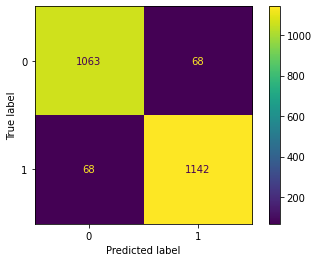

In [25]:
plot_confusion_matrix(tree, X_test, y_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1131
           1       0.94      0.94      0.94      1210

    accuracy                           0.94      2341
   macro avg       0.94      0.94      0.94      2341
weighted avg       0.94      0.94      0.94      2341



In [28]:
X_test

,DispositionScore,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag]
441,0.000,19.978670,5.870000e-05,-5.870000e-05,137.170610,0.002400,-0.002400,0.923,0.006,-0.011,10.16800,0.17800,-0.17800,944.0,13.0,-13.0,6.85,2.90,-1.56,1351.0,788.02,997.18,-402.86,86.2,1.0,9651.0,272.0,-467.0,4.229,0.126,-0.234,1.895,0.803,-0.432,299.15353,40.286961,13.849
8525,0.000,12.426181,3.850000e-04,-3.850000e-04,141.530700,0.030700,-0.030700,0.980,0.106,-0.005,29.09000,2.00000,-2.00000,92.2,2.6,-2.6,1.88,0.51,-0.63,976.0,214.85,172.60,-130.41,39.0,1.0,5948.0,161.0,-178.0,4.106,0.350,-0.150,1.432,0.391,-0.478,297.64059,40.531952,13.219
1632,0.000,18.692861,1.750000e-06,-1.750000e-06,143.833183,0.000077,-0.000077,0.116,0.023,-0.078,3.88584,0.00636,-0.00636,51300.0,48.0,-48.0,14.81,2.00,-0.92,528.0,18.40,8.27,-3.90,1281.9,1.0,5190.0,156.0,-140.0,4.660,0.028,-0.083,0.660,0.089,-0.041,295.03354,46.600151,16.147
2911,1.000,6.331252,3.800000e-05,-3.800000e-05,137.141490,0.004820,-0.004820,0.094,0.370,-0.094,2.68800,0.15000,-0.15000,307.0,21.8,-21.8,1.31,0.23,-0.10,822.0,108.04,59.23,-26.06,16.2,1.0,5383.0,159.0,-159.0,4.603,0.035,-0.112,0.759,0.132,-0.057,299.08099,42.018139,15.411
7087,0.000,1.036592,5.140000e-07,-5.140000e-07,132.089545,0.000434,-0.000434,1.250,1.190,-0.188,2.29600,0.02170,-0.02170,2120.0,16.4,-16.4,293.01,50.40,-75.60,4194.0,73013.77,32116.38,-35125.08,150.6,1.0,4884.0,58.0,-72.0,2.737,0.162,-0.108,8.747,1.504,-2.256,294.36172,50.307598,11.449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,0.988,18.302723,1.490000e-04,-1.490000e-04,142.891660,0.006410,-0.006410,0.742,0.165,-0.507,8.26200,0.21700,-0.21700,187.0,8.3,-8.3,2.72,0.65,-0.44,902.0,156.71,99.65,-52.00,24.7,1.0,5528.0,88.0,-77.0,3.892,0.120,-0.120,1.839,0.440,-0.293,292.71445,44.082329,14.310
243,1.000,20.090170,6.630000e-05,-6.630000e-05,147.977880,0.002750,-0.002750,0.886,0.014,-0.638,4.15400,0.15400,-0.15400,1430.0,41.4,-41.4,2.25,0.14,-0.21,362.0,4.05,0.91,-0.98,36.9,3.0,3906.0,78.0,-86.0,4.730,0.052,-0.024,0.509,0.032,-0.046,282.23251,43.665630,15.777
2130,0.992,2.810432,2.120000e-05,-2.120000e-05,133.408210,0.006070,-0.006070,0.351,0.115,-0.351,3.87400,0.18500,-0.18500,47.4,3.1,-3.1,1.43,0.24,-0.39,1701.0,1978.53,885.15,-986.59,17.8,1.0,5415.0,81.0,-72.0,3.868,0.196,-0.084,2.079,0.349,-0.567,295.45367,42.858799,13.388
3888,0.008,0.715826,3.440000e-06,-3.440000e-06,132.064280,0.003710,-0.003710,0.099,0.351,-0.099,1.21200,0.13300,-0.13300,40.6,4.6,-4.6,0.58,0.15,-0.07,1920.0,3196.46,2503.74,-949.10,11.0,1.0,5640.0,152.0,-152.0,4.486,0.075,-0.175,0.909,0.242,-0.104,297.22046,47.748249,13.467


In [29]:
X_test.iloc[0]

DispositionScore                                    0.000000
OrbitalPeriod[days                                 19.978670
OrbitalPeriodUpperUnc.[days                         0.000059
OrbitalPeriodLowerUnc.[days                        -0.000059
TransitEpoch[BKJD                                 137.170610
TransitEpochUpperUnc.[BKJD                          0.002400
TransitEpochLowerUnc.[BKJD                         -0.002400
ImpactParamete                                      0.923000
ImpactParameterUpperUnc                             0.006000
ImpactParameterLowerUnc                            -0.011000
TransitDuration[hrs                                10.168000
TransitDurationUpperUnc.[hrs                        0.178000
TransitDurationLowerUnc.[hrs                       -0.178000
TransitDepth[ppm                                  944.000000
TransitDepthUpperUnc.[ppm                          13.000000
TransitDepthLowerUnc.[ppm                         -13.000000
PlanetaryRadius[Earthrad

In [30]:
# Instantiate model
forest = RandomForestClassifier(n_estimators=100, criterion='gini')
# Fitting Model to the train set
forest.fit(X_train, y_train)
# Predicting on the test set
y_pred = forest.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.9594190516873131
Recall: 0.943801652892562
F1 Score: 0.9600672551492224
Precision: 0.9769033361847733

Confusion Matrix:
 TN,  FP, FN, TP
[1104   27   68 1142]


In [31]:
import joblib

In [32]:
joblib.dump(forest, 'ml_model.joblib')

['ml_model.joblib']

In [53]:
X_test.tail()

,DispositionScore,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag]
1802,0.988,18.302723,0.000149,-0.000149,142.89166,0.00641,-0.00641,0.742,0.165,-0.507,8.262,0.217,-0.217,187.0,8.3,-8.3,2.72,0.65,-0.44,902.0,156.71,99.65,-52.00,24.7,1.0,5528.0,88.0,-77.0,3.892,0.120,-0.120,1.839,0.440,-0.293,292.71445,44.082329,14.310
243,1.000,20.090170,0.000066,-0.000066,147.97788,0.00275,-0.00275,0.886,0.014,-0.638,4.154,0.154,-0.154,1430.0,41.4,-41.4,2.25,0.14,-0.21,362.0,4.05,0.91,-0.98,36.9,3.0,3906.0,78.0,-86.0,4.730,0.052,-0.024,0.509,0.032,-0.046,282.23251,43.665630,15.777
2130,0.992,2.810432,0.000021,-0.000021,133.40821,0.00607,-0.00607,0.351,0.115,-0.351,3.874,0.185,-0.185,47.4,3.1,-3.1,1.43,0.24,-0.39,1701.0,1978.53,885.15,-986.59,17.8,1.0,5415.0,81.0,-72.0,3.868,0.196,-0.084,2.079,0.349,-0.567,295.45367,42.858799,13.388
3888,0.008,0.715826,0.000003,-0.000003,132.06428,0.00371,-0.00371,0.099,0.351,-0.099,1.212,0.133,-0.133,40.6,4.6,-4.6,0.58,0.15,-0.07,1920.0,3196.46,2503.74,-949.10,11.0,1.0,5640.0,152.0,-152.0,4.486,0.075,-0.175,0.909,0.242,-0.104,297.22046,47.748249,13.467
3902,0.976,174.510276,0.002150,-0.002150,201.47056,0.00966,-0.00966,0.024,0.413,-0.024,6.689,0.345,-0.345,1530.0,115.0,-115.0,1.74,0.14,-0.20,186.0,0.28,0.09,-0.09,14.8,1.0,4367.0,124.0,-155.0,4.822,0.060,-0.054,0.452,0.038,-0.052,300.48816,44.460670,15.873


In [59]:
y_test

441     0
8525    0
1632    0
2911    1
7087    0
       ..
1802    1
243     1
2130    1
3888    0
3902    1
Name: ExoplanetCandidate, Length: 2341, dtype: int64

In [56]:
newexo = forest.predict(X_test.tail())

In [57]:
newexo

array([1, 1, 1, 0, 1])

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1131
           1       0.98      0.94      0.96      1210

    accuracy                           0.96      2341
   macro avg       0.96      0.96      0.96      2341
weighted avg       0.96      0.96      0.96      2341

